To improve our accuracy even further, we will be using a new technique we have learnt - k-nearest neighbors (KNN) algorithm. This technique starts by determining the k points that are closest to the data point of interest. The popularity of the k closest points will then be averaged out to determine the expected popularity of this point of interest. Addtionally, we will be preparing our dataset and cleaning further to ensure accuracy.

Based on our learnings from the previous models and the EDA, to ensure higher accuracy, we will be making the following changes in data preparation:

1. Only considering songs released from 2016 onwards as songs released earlier have a significantly lower popularity as shown in our EDA. This significant effect of earlier release years on popularity might have been significantly affecting the actual weights of the other attributes in our models.
2. Additionally, the dataset will be normalized so that each variable has a value between 0 and 1. As a result, our predictor will give equal weight to each of our features. Normalization can help improve the performance of some machine learning algorithms, such as K-Nearest Neighbors (KNN) and neural networks, by reducing the effects of outliers and improving the convergence of the optimization algorithm.
3. Lastly, error function - Mean Squared Error will be used as our data is continuous and thus best suited for this.



Note:
The accuracy is not a suitable metric for evaluating a regression model like KNN. Instead, mean squared error (MSE) is used to measure the model's accuracy. In the code above, the MSE is calculated using the mean_squared_error() function from sklearn.metrics library. The lower the value of MSE, the better the model performance.

In [200]:
#import necessary libraries 
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from sklearn.neighbors import KNeighborsRegressor #like KNN, but for continuous data
from sklearn import preprocessing

In [201]:
df = pd.read_csv('../Data/tracks_cleaned.csv')

## Data Preparation


As the k-nearest neighbors regressor algorithm requires quantitative features, we’ll drop the non-quantitative attributes - Date_Released

In [202]:
df.drop(['release_date'],axis=1, inplace=True)
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,num_artists,year
count,469281.000000,4.692810e+05,469281.000000,469281.000000,469281.000000,469281.000000,469281.000000,469281.000000,469281.000000,469281.000000,469281.000000,469281.000000,469281.000000,469281.000000,469281.000000,469281.000000,469281.000000
mean,27.578334,2.299850e+05,0.044155,0.563647,0.542439,5.224840,-10.200712,0.659208,0.104881,0.449396,0.113413,0.213992,0.552442,118.465459,3.873500,1.295914,1988.594946
std,18.366320,1.270919e+05,0.205439,0.166195,0.251780,3.517928,5.086349,0.473976,0.179904,0.348656,0.266952,0.184386,0.257641,29.784032,0.472858,0.887235,22.813764
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1922.000000
25%,13.000000,1.750530e+05,0.000000,0.453000,0.344000,2.000000,-12.887000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.549000,4.000000,1.000000,1974.000000
50%,27.000000,2.149070e+05,0.000000,0.577000,0.550000,5.000000,-9.233000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.363000,4.000000,1.000000,1992.000000
75%,41.000000,2.638000e+05,0.000000,0.686000,0.749000,8.000000,-6.482000,1.000000,0.076400,0.784000,0.009460,0.278000,0.769000,136.335000,4.000000,1.000000,2007.000000
max,98.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,243.507000,5.000000,58.000000,2021.000000


Additionally, in our EDA, we noticed that Popularity is very closely related to release year. This may have contributed drastically to the determination of the weights of the other attributes in our previous model. As such, now we will consider recent songs(2016 onwards) for the following reasons:

1. Release year is very strongly related to popularity and affects the weights of the other attibutes when determining popularity
2. Given our problem statement of predicting song performance in the future, it is not apt to consider release year.

As such, songs released before 2016 will be dropped below

In [203]:
df_recent = df[df['year']>=2016] #so our songs are more recent
df_recent.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,num_artists,year
count,51157.000000,5.115700e+04,51157.000000,51157.000000,51157.000000,51157.000000,51157.000000,51157.000000,51157.000000,51157.000000,51157.000000,51157.000000,51157.000000,51157.00000,51157.000000,51157.000000,51157.000000
mean,42.068006,2.169741e+05,0.193756,0.639440,0.646134,5.364564,-7.418846,0.567899,0.108468,0.279781,0.097057,0.194897,0.495742,121.71033,3.941513,1.470160,2018.418457
std,22.390953,1.197536e+05,0.395244,0.159736,0.208227,3.596722,3.923544,0.495373,0.110522,0.281558,0.257319,0.166846,0.241166,29.01061,0.367874,1.028198,1.617641
min,0.000000,6.360000e+03,0.000000,0.000000,0.000000,0.000000,-54.376000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2016.000000
25%,31.000000,1.778820e+05,0.000000,0.540000,0.519000,2.000000,-8.643000,0.000000,0.038900,0.039600,0.000000,0.096700,0.307000,98.95800,4.000000,1.000000,2017.000000
50%,48.000000,2.078130e+05,0.000000,0.658000,0.668000,6.000000,-6.652000,1.000000,0.060500,0.178000,0.000002,0.125000,0.491000,122.02700,4.000000,1.000000,2019.000000
75%,58.000000,2.421600e+05,0.000000,0.757000,0.805000,9.000000,-5.112000,1.000000,0.133000,0.459000,0.001060,0.241000,0.685000,139.93200,4.000000,2.000000,2020.000000
max,98.000000,4.864333e+06,1.000000,0.987000,1.000000,11.000000,1.634000,1.000000,0.966000,0.996000,1.000000,0.992000,1.000000,229.86200,5.000000,58.000000,2021.000000


Additionally, the dataset will be normalized so that each variable has a value between 0 and 1. As a result, our predictor will give equal weight to each of our features.

In [204]:
#normalize the dataset
df_recent=(df_recent-df_recent.min())/(df_recent.max()-df_recent.min())

Our data will now be randomly divided between training and testing sets with an 8:2 ratio. This will enable us to calculate our model's final error when projecting onto new data. A validation set will also be created from the training set. The ideal value of k for our model will be chosen later using this validation set.

In [205]:
np.random.seed(1) 


df_train_full = df_recent.sample(frac=0.8,random_state=1) 
df_test = df_recent.drop(df_train_full.index)

df_validation = df_train_full.sample(frac=0.2,random_state=2)
df_train = df_train_full.drop(df_validation.index)

In [206]:

predict = "popularity"
X_train = df_train.drop(columns=[predict])
X_validation = df_validation.drop(columns=[predict])
X_test = df_test.drop(columns=[predict])
Y_train = df_train[[predict]].values.ravel() 
Y_validation = df_train[[predict]].values.ravel()
Y_test = df_train[[predict]].values.ravel()

Setting up error function

In [207]:

def calculate_error(Y_pred, Y_actual):
    error = 0
    for i in range(len(Y_pred)):
        error += abs(Y_pred[i] - Y_actual[i])**2
    return error / len(Y_pred)

## Model Training

In [208]:
# we will run a k nearest neighbours algorithm on this dataset,
# so we will run the algorithm many times to find the best k value
k_errors = [np.inf] # k=0 should have infinite error
for k in range(1,50):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, Y_train) 
    Y_val_pred = model.predict(X_validation)
    k_errors.append(calculate_error(Y_val_pred, Y_validation))

Plotting the graph to determine optimal value of K

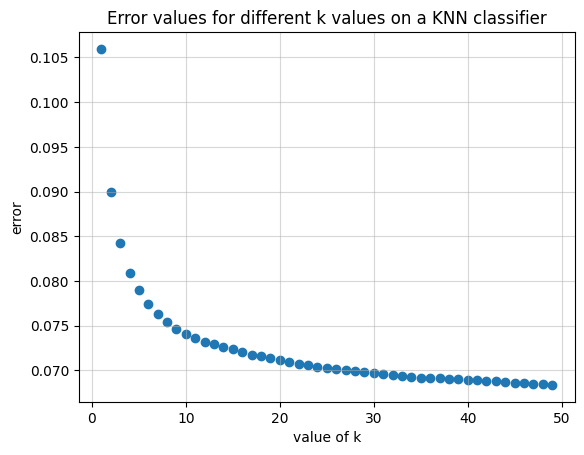

In [209]:
if not os.path.exists('figs'):
    os.makedirs('figs')

plt.scatter(x=range(len(k_errors)), 
            y=k_errors)
plt.xlabel('value of k')
plt.ylabel('error')
plt.title('Error values for different k values on a KNN classifier')
plt.grid(axis='both',alpha=0.5)

plt.show()

The plot demonstrates that the error constantly lowers as the value of k increases, with a k value of 49 corresponding to the lowest error. However, if we select this lowest error value, our model would be overfit to our dataset.

Overfitting occurs when we train our model to be very specialized to our dataset, making it a poor predictor for unobserved data.

You can use the elbow of the plot as a guide to choose the best k value for the k-nearest neighbors algorithm. The error stops rapidly dropping at this elbow.

As such from the graph above the elbow is seen at the point where k = 9

In [210]:
k=9
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train, Y_train) 
Y_pred = model.predict(X_test)
print(f"Our testing error is {calculate_error(Y_pred, Y_test)}\n\n")

Our testing error is 0.07395982419290013




## Reducing Testing Error

Next, let us try reducing the testing error by implementing cross-validation on the above model. Cross-validation helps to reduce overfitting by evaluating the model on different subsets of the data. By splitting the data into multiple folds and training the model on different combinations of the folds, we can get a better estimate of the model's generalization performance.

When we train a model on a single training set and evaluate its performance on a single validation or test set, there is a risk of overfitting to the particular training and evaluation data. Cross-validation helps to reduce this risk by training and evaluating the model on different subsets of the data, thus providing a more robust estimate of the model's performance on new, unseen data.

By using cross-validation, we can better estimate the model's performance on new data and select the model that performs best on average across all the folds. This can help to avoid selecting a model that performs well on a specific set of data, but poorly on new, unseen data.

The main changes to the code are as follows:

1. We no longer split the recent data into training, validation, and testing sets. Instead, we use the entire recent data for cross-validation.

2. We use scikit-learn's KFold function to set up cross-validation with k=5 folds. This splits the data into 5 folds, shuffles them randomly, and iterates over them to train and test the model on different subsets of the data.

3. Inside the cross-validation loop, we train the model on the training set, predict the output on the test set, and calculate the mean squared error between the predicted output and the actual output.

4. We store the mean squared error for each value of k over all cross-validation folds, and select the best k as the one that minimizes the mean squared error.

5. Finally, we train the model on the entire recent data using the best k, predict the output on the entire recent data, and calculate the mean squared error between the predicted output and the actual output as our training error. This provides a more reliable estimate of the

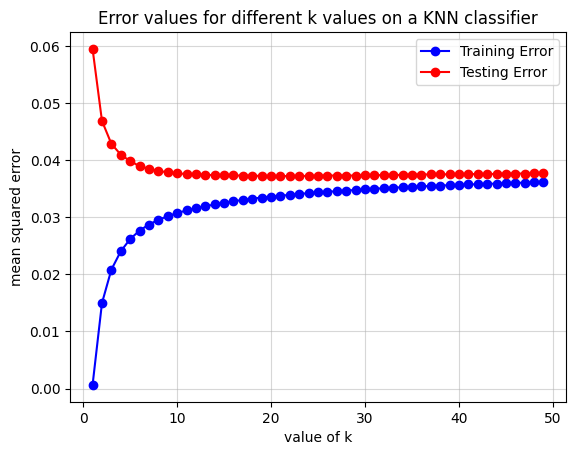

Our training error is 0.033478964736836134
Our testing error is 0.03714905425023045
The best k value is 21


In [211]:
#import necessary libraries 
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor #like KNN, but for continuous data
from sklearn import preprocessing
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('../Data/tracks_cleaned.csv')

df.drop(['release_date'],axis=1, inplace=True)
df.describe()

df_recent = df[df['year']>=2016] #so our songs are more recent
df_recent.describe()

#normalize the dataset
df_recent=(df_recent-df_recent.min())/(df_recent.max()-df_recent.min())

np.random.seed(1) 

predict = "popularity"
X = df_recent.drop(columns=[predict])
Y = df_recent[[predict]].values.ravel()

# split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# set up cross-validation with k=5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=1)

train_errors = []
test_errors = []
best_k_values = []

for k in range(1,50):
    train_error = 0
    test_error = 0
    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        Y_train_fold, Y_test_fold = Y_train[train_index], Y_train[test_index]
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train_fold, Y_train_fold) 
        Y_train_pred = model.predict(X_train_fold)
        Y_test_pred = model.predict(X_test_fold)
        train_error += mean_squared_error(Y_train_pred, Y_train_fold)
        test_error += mean_squared_error(Y_test_pred, Y_test_fold)
    train_errors.append(train_error / kf.get_n_splits())
    test_errors.append(test_error / kf.get_n_splits())
    best_k_values.append(k)

if not os.path.exists('figs'):
    os.makedirs('figs')

plt.plot(best_k_values, train_errors, 'bo-', label='Training Error')
plt.plot(best_k_values, test_errors, 'ro-', label='Testing Error')
plt.xlabel('value of k')
plt.ylabel('mean squared error')
plt.title('Error values for different k values on a KNN classifier')
plt.grid(axis='both',alpha=0.5)
plt.legend()

plt.show()

best_k = np.argmin(test_errors) + 1
model = KNeighborsRegressor(n_neighbors=best_k)
model.fit(X_train, Y_train) 
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)
train_error = mean_squared_error(Y_train_pred, Y_train)
test_error = mean_squared_error(Y_test_pred, Y_test)

print(f"Our training error is {train_error}")
print(f"Our testing error is {test_error}")
print(f"The best k value is {best_k}")


## Analysis

As seen above, when cross validation is done, the testing error decreases from 0.0740 to 0.0371. As such, it confirms that cross validation has helped in reducing overfitting.

The training error represents the error or loss calculated on the training data, while the testing error represents the error or loss calculated on the testing data.

As the value of k increases, the model becomes less complex and tends to underfit the training data, which causes the training error to increase. On the other hand, a smaller k value makes the model more complex, and it can overfit the training data, leading to a low training error. However, the model may not generalize well on unseen data, which can lead to a high testing error.

Therefore, the testing error tends to decrease as the k value increases until it reaches a certain point where the model starts to underfit the data, and the testing error increases again. At this point, the k value that gives the lowest testing error is considered the best k value. In the graph plotted, this value is around k=21. The optimal k value depends on the complexity of the data, the number of features, and the size of the dataset, among other factors. It is not solely based on the number of attributes in the dataset.



The testing error of 0.03714905425023045 represents the average mean squared error between the predicted and actual popularity values for the test set. Since mean squared error is a measure of the average squared difference between the predicted and actual values, a lower value indicates better accuracy. In this case, the testing error of 0.03714905425023045 indicates that the model's predictions for the popularity values of the test set are, on average, very close to the actual values, and therefore the model is accurate for predicting popularity values for new songs. A mean squared error of 0.037 suggests that this model is performing reasonably well at predicting the popularity of songs in the test data.

##  Visualisation of Model Performance

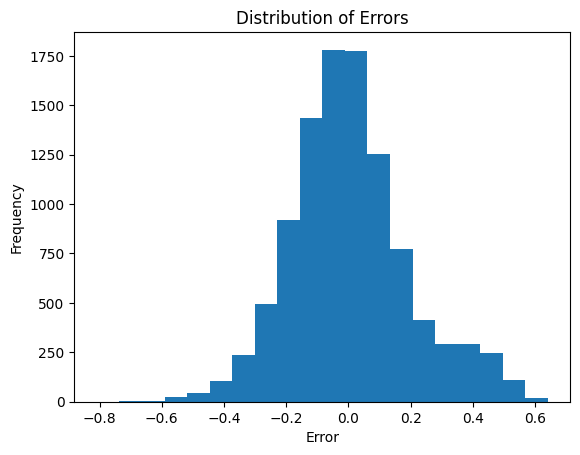

In [212]:
# calculate errors
errors = Y_test_pred - Y_test

# create histogram of errors
plt.hist(errors, bins=20)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.show()



Above is a histogram of the errors between the predicted and actual values. The errors are almost normally distributed around 0, showing that this is a good indication that the model is making accurate predictions.

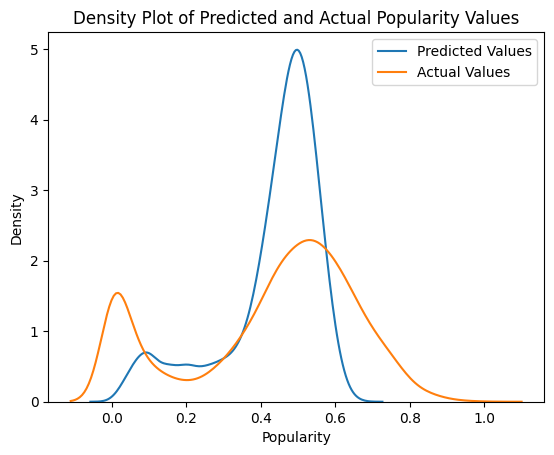

In [213]:
import seaborn as sns

sns.kdeplot(Y_test_pred[:10000], label='Predicted Values')
sns.kdeplot(Y_test[:10000], label='Actual Values')
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.title('Density Plot of Predicted and Actual Popularity Values')
plt.legend()
plt.show()


Similarly, the density plot seems to be matchinng the dense and less dense areas

## Feature Analysis

Feature analysis to conclude importance of features

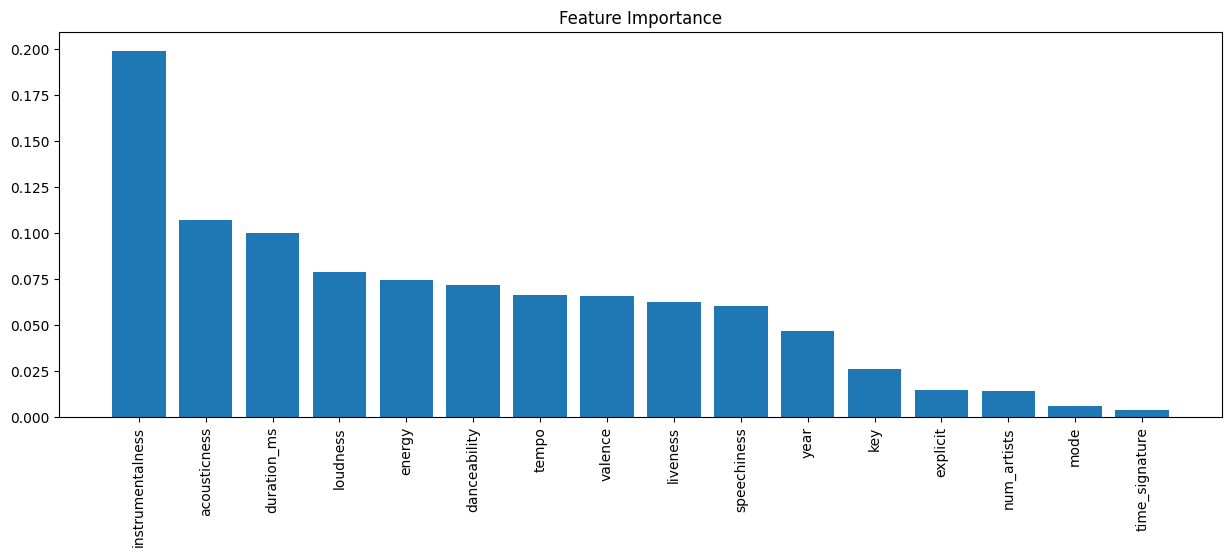

In [214]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model with 100 trees
model = RandomForestRegressor(n_estimators=100)

# Fit the model on the training data
model.fit(X_train, Y_train)

# Get feature importances from the model
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(15,5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()


This agreed with the importance given to each feature in our EDA. Note that for year, the importance is lower as the data for year has been shaved off